In [1]:
import pandas as pd

In [24]:
data = pd.read_csv("quadruple_predictions_detailed.csv")

In [26]:
data.head()

,Unnamed: 0,bank,review,rating,Aspects,Opinions,Sentiments,Categories
0,0,SBI,State Bank Of India is located nearby in our a...,4.0,"['saving account', 'customer service', 'bank s...","['open', 'good', 'on time', 'easy']","['positive', 'positive', 'positive', 'positive']","['SUPPORT#GENERAL', 'SERVICE#GENERAL', 'SUPPOR..."
1,1,SBI,"I have my salary account in SBI, when I applie...",5.0,"['salary account', 'net banking', 'offer in th...","['satisfied', 'functioning smooth and convenie...","['positive', 'positive', 'positive']","['SUPPORT#GENERAL', 'SOFTWARE#OPERATION_PERFOR..."
2,2,Axis Bank,I am using Axis bank saving account for the p...,5.0,['saving account'],['safe'],['positive'],['SOFTWARE#OPERATION_PERFORMANCE']
3,3,HDFC Bank,I have my salary bank account in HDFC bank for...,5.0,['HDFC bank'],['good experience'],['positive'],['SUPPORT#GENERAL']
4,4,review,"Close to around 10 years, I am holding this Co...",5.0,['Corporation Bank savings account'],['interesting'],['positive'],['SOFTWARE#OPERATION_PERFORMANCE']


In [25]:
unique_categories = exploded_df["Categories"].unique()
print("Unique categories:")
for cat in unique_categories:
    print(f"- {cat}")


Unique categories:
- SUPPORT#GENERAL
- SERVICE#GENERAL
- FOOD#STYLE_OPTIONS
- SOFTWARE#OPERATION_PERFORMANCE
- CHARGE#GENERAL
- SOFTWARE#GENERAL
- HARDWARE#OPERATION_PERFORMANCE
- SBI#GENERAL
- SMS#GENERAL
- COMPANY#GENERAL
- CHARGE#QUALITY
- SINCE#GENERAL
- interest rate
- LAPTOP#PRICE
- SOFTWARE#USABILITY
- LAPTOP#OPERATION_PERFORMANCE
- PRICE#GENERAL
- LOCATION#GENERAL
- LAPTOP#GENERAL
- Facilities#GENERAL
- RESTAURANT#GENERAL
- HARDWARE#GENERAL
- SINGLE_OPTIONS
- CHARTER#GENERAL
- SMS#QUALITY
- SPORTS#QUALITY
- BATTERY#OPERATION_PERFORMANCE
- SMS#USABILITY
- SPORTS#USABILITY
- SALARY#GENERAL
- AMBIENCE#GENERAL
- 
- SUPPORT#USABILITY
- FOOD#QUALITY
- CHARGE#OPERATION_PERFORMANCE
- interest rate#GENERAL
- CARD#GENERAL
- Cash#OPERATION_PERFORMANCE
- CHARTERS#GENERAL
- PORTS#USABILITY
- CURRENCY#GENERAL
- POS machines#USABILITY
- SPORTS#GENERAL
- LAKSHMI VILAS BANK#GENERAL
- CARD#OPERATION_PERFORMANCE
- CARD#QUALITY
- SINKS#QUALITY
- 6%
- PRICE#DESIGN_FEATURES
- SALARY#QUALITY
- intere

In [27]:
category_mapping = {
    # High-frequency main groups
    "SUPPORT#GENERAL": "SUPPORT",
    "SUPPORT#USABILITY": "SUPPORT",
    
    "SERVICE#GENERAL": "SERVICE",
    
    "SOFTWARE#GENERAL": "SOFTWARE",
    "SOFTWARE#USABILITY": "SOFTWARE",
    "SOFTWARE#OPERATION_PERFORMANCE": "SOFTWARE",
    
    "SMS#GENERAL": "COMMUNICATION",
    "SMS#USABILITY": "COMMUNICATION",
    "SMS#QUALITY": "COMMUNICATION",

    "PRICE#GENERAL": "PRICE",
    "PRICE#DESIGN_FEATURES": "PRICE",
    
    "BATTERY#OPERATION_PERFORMANCE": "BATTERY",
    "CHARGE#GENERAL": "CHARGE",
    "CHARGE#OPERATION_PERFORMANCE": "CHARGE",
    "CHARGE#QUALITY": "CHARGE",

    "LAPTOP#GENERAL": "LAPTOP",
    "LAPTOP#OPERATION_PERFORMANCE": "LAPTOP",
    "LAPTOP#PRICE": "LAPTOP",
    
    "CARD#GENERAL": "CARD",
    "CARD#OPERATION_PERFORMANCE": "CARD",
    "CARD#QUALITY": "CARD",

    "SPORTS#GENERAL": "OTHER",
    "SPORTS#QUALITY": "OTHER",
    "SPORTS#USABILITY": "OTHER",
    "RESTAURANT#GENERAL": "OTHER",
    "FOOD#QUALITY": "OTHER",
    "FOOD#STYLE_OPTIONS": "OTHER",
    "SINKS#QUALITY": "OTHER",
    "POS machines#USABILITY": "OTHER",
    "LOCATION#GENERAL": "OTHER",
    "SALARY#GENERAL": "OTHER",
    "SALARY#QUALITY": "OTHER",
    "COMPANY#GENERAL": "OTHER",
    "SINGLE_OPTIONS": "OTHER",
    "Facilities#GENERAL": "OTHER",
    "Cash#OPERATION_PERFORMANCE": "OTHER",
    "CURRENCY#GENERAL": "OTHER",
    "LAKSHMI VILAS BANK#GENERAL": "OTHER",
    "CHARTERS#GENERAL": "OTHER",
    "interest rate": "FINANCE",
    "interest rate#GENERAL": "FINANCE",
    "interest rate for savings account": "FINANCE",
    "6%": "FINANCE",

    "SBI#GENERAL": "BANK",
    "CHARTER#GENERAL": "OTHER",  # or BANK, if relevant

    "HARDWARE#GENERAL": "HARDWARE",
    "HARDWARE#OPERATION_PERFORMANCE": "HARDWARE",
    "PORTS#USABILITY": "HARDWARE",
}


In [28]:
df_exploded["Simplified_Category"] = df_exploded["Categories"].map(category_mapping).fillna("OTHER")


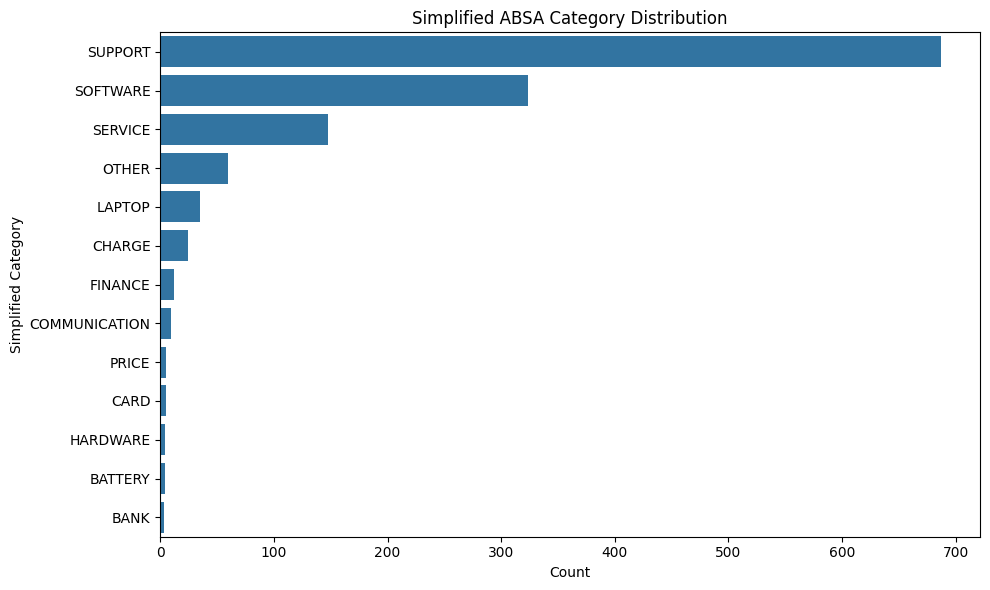

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_exploded, y="Simplified_Category", order=df_exploded["Simplified_Category"].value_counts().index)
plt.title("Simplified ABSA Category Distribution")
plt.xlabel("Count")
plt.ylabel("Simplified Category")
plt.tight_layout()
plt.show()


In [30]:
df_exploded = df.explode(["Aspects", "Opinions", "Sentiments", "Categories"])

# Apply mapping to a new column
category_mapping = {
    "LAPTOP#GENERAL": "LAPTOP",
    "LAPTOP#OPERATION_PERFORMANCE": "LAPTOP",
    "LAPTOP#PRICE": "LAPTOP",
    # include others as needed...
}
df_exploded["Simplified_Category"] = df_exploded["Categories"].map(category_mapping).fillna("OTHER")

# Now filter for LAPTOP
laptop_df = df_exploded[df_exploded["Simplified_Category"] == "LAPTOP"]

In [32]:
laptop_df[["bank", "review", "Aspects", "Opinions", "Sentiments", "Categories"]].head(10)

,bank,review,Aspects,Opinions,Sentiments,Categories
29,review,I am doing all my transactions with Indian ban...,savings account,normal rate of interest,positive,LAPTOP#PRICE
40,Canara Bank,Canara Bank has a very good app and also inter...,balance,no need to maintain,positive,LAPTOP#OPERATION_PERFORMANCE
58,Citibank,Taken my savings account from CITI Bank and i...,minimum balance,need to decrease,positive,LAPTOP#OPERATION_PERFORMANCE
60,Axis Bank,I am doing all my transactions through AXIS Ba...,savings account,using,positive,LAPTOP#GENERAL
60,Axis Bank,I am doing all my transactions through AXIS Ba...,balance,keeping,positive,LAPTOP#OPERATION_PERFORMANCE
65,HDFC Bank,"2 years before, i have purchased the savings a...",home loan,NULL,positive,LAPTOP#GENERAL
68,HDFC Bank,"3 years back, i have opened the salary account...",salary account,NULL,neutral,LAPTOP#GENERAL
102,HDFC Bank,Using my savings account with HDFC bank for al...,balance,NULL,negative,LAPTOP#OPERATION_PERFORMANCE
104,HDFC Bank,I am holding salary account with HDFC past 1 y...,salary account,need to maintain a minimum balance amount,positive,LAPTOP#GENERAL
115,IDBI,IDBI bank account benefits are not good hence ...,savings account,NULL,negative,LAPTOP#GENERAL


In [33]:
print(laptop_df["Aspects"].value_counts())
print(laptop_df["Opinions"].value_counts())


Aspects
salary account          12
balance                  5
savings account          4
account                  3
cheque book              2
minimum balance          1
balance maintenance      1
home loan                1
ATM facility             1
passbook                 1
saving account           1
HDFC savings account     1
amount                   1
balance account          1
Name: count, dtype: int64
Opinions
NULL                                         11
zero balance account                          4
high                                          3
zero balance                                  3
no need to maintain a minimum balance         2
using                                         2
no need to maintain                           1
normal rate of interest                       1
no requirement                                1
need to maintain a minimum balance amount     1
keeping                                       1
need to decrease                              1
ava

In [36]:
cats = {
    "CHARGE#GENERAL": "CHARGE",
    "CHARGE#OPERATION_PERFORMANCE": "CHARGE",
    "CHARGE#QUALITY": "CHARGE",
}
df_exploded["Simplified_Category"] = df_exploded["Categories"].map(cats).fillna("OTHER")

# Now filter for LAPTOP
charge_df = df_exploded[df_exploded["Simplified_Category"] == "CHARGE"]

In [37]:
charge_df[["bank", "review", "Aspects", "Opinions", "Sentiments", "Categories"]].head(10)


,bank,review,Aspects,Opinions,Sentiments,Categories
7,Kotak,"Its been 2 years, i am using Kotak Bank saving...",debit card fees,NULL,negative,CHARGE#GENERAL
20,SBI,I maintain salary cum saving account with SBI....,SMS charge,applied of 12 - 15 rupees,positive,CHARGE#QUALITY
20,SBI,I maintain salary cum saving account with SBI....,ATM charges,applied if I cross more than 5 times in a mont...,positive,CHARGE#QUALITY
28,SBI,I have been using saving account with SBI for ...,hidden charge,use to detect some amount,negative,CHARGE#GENERAL
114,SBI,I am having my saving account for past 9-10 ye...,charge,NULL,negative,CHARGE#QUALITY
122,review,"On my personal need, I opened a saving account...",charges,applicable,negative,CHARGE#GENERAL
194,HDFC Bank,I am holding my salary account from HDFC bank ...,hidden charge,NULL,positive,CHARGE#GENERAL
201,Axis Bank,I am holding salary account with AXIS. Some ti...,atm charge,applicable,negative,CHARGE#OPERATION_PERFORMANCE
206,review,DBS Bank has a very good and fast Internet ban...,no charges,NULL,positive,CHARGE#GENERAL
212,review,I am using SYNDICATE Bank savings account more...,debit card charges,no,negative,CHARGE#GENERAL


In [38]:
print(charge_df["Aspects"].value_counts())
print(charge_df["Opinions"].value_counts())

Aspects
charges                  5
hidden charge            3
ATM charges              2
SMS charge               2
debit card charges       2
hidden charges           2
charge                   1
debit card fees          1
no charges               1
atm charge               1
consolidation charges    1
ATM charge               1
tax charges              1
Atmosphere charges       1
Name: count, dtype: int64
Opinions
NULL                                                            4
applicable                                                      3
no                                                              3
high                                                            2
use to detect some amount                                       1
applied if I cross more than 5 times in a month of 40 rupees    1
applicable more than 5 times in a month                         1
applied of 12 - 15 rupees                                       1
applicable for more than 5 transactions            